In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install piano_transcription_inference pretty_midi librosa mido

In [3]:
!wget https://github.com/qiuqiangkong/piano_transcription_inference/raw/master/resources/cut_liszt.mp3

--2024-12-01 19:39:58--  https://github.com/qiuqiangkong/piano_transcription_inference/raw/master/resources/cut_liszt.mp3
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qiuqiangkong/piano_transcription_inference/master/resources/cut_liszt.mp3 [following]
--2024-12-01 19:39:59--  https://raw.githubusercontent.com/qiuqiangkong/piano_transcription_inference/master/resources/cut_liszt.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240633 (235K) [audio/mpeg]
Saving to: ‘cut_liszt.mp3’

cut_liszt.mp3       100%[===================>] 234.99K  --.-KB/s    in 0.03s   

2024-12-01 19:39:59 (8.90 MB/

In [1]:
from piano_transcription_inference import PianoTranscription, sample_rate, load_audio
import librosa

print("librosa v=" + str(librosa.__version__))

# Load audio
(audio, _) = librosa.load('/content/cut_liszt.mp3', sr=sample_rate, mono=True)

# Transcriptor
transcriptor = PianoTranscription(device='cuda')    # 'cuda' | 'cpu'

# Transcribe and write out to MIDI file
transcribed_dict = transcriptor.transcribe(audio, 'ur.mid')

ModuleNotFoundError: No module named 'piano_transcription_inference'

In [ ]:
# prompt: save the pip modules and version to a requirements.txt file
!pip freeze > requirements.txt


In [ ]:
import pretty_midi
import numpy as np

# Load the MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/ur.mid')

# Get the piano roll
piano_roll = midi_data.get_piano_roll()

# The resulting piano_roll is a numpy array with shape (128, time)
# where 128 represents the MIDI note numbers (0-127)
# and time is the number of time steps

In [2]:
from mido import MidiFile
import pprint
midi = MidiFile('/content/ur.mid')

len(midi.tracks)

ModuleNotFoundError: No module named 'mido'

In [ ]:
midi.tracks[0]

MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=1)])

In [ ]:
track = midi.tracks[1]
types = []
messages = []

for message in track:
    if message.type not in types:
        types.append(message.type)
        messages.append(message)

pprint.pprint(types)
print()
pprint.pprint(messages)

['control_change', 'note_on', 'end_of_track']

[Message('control_change', channel=0, control=64, value=127, time=130),
 Message('note_on', channel=0, note=54, velocity=74, time=5),
 MetaMessage('end_of_track', time=1)]


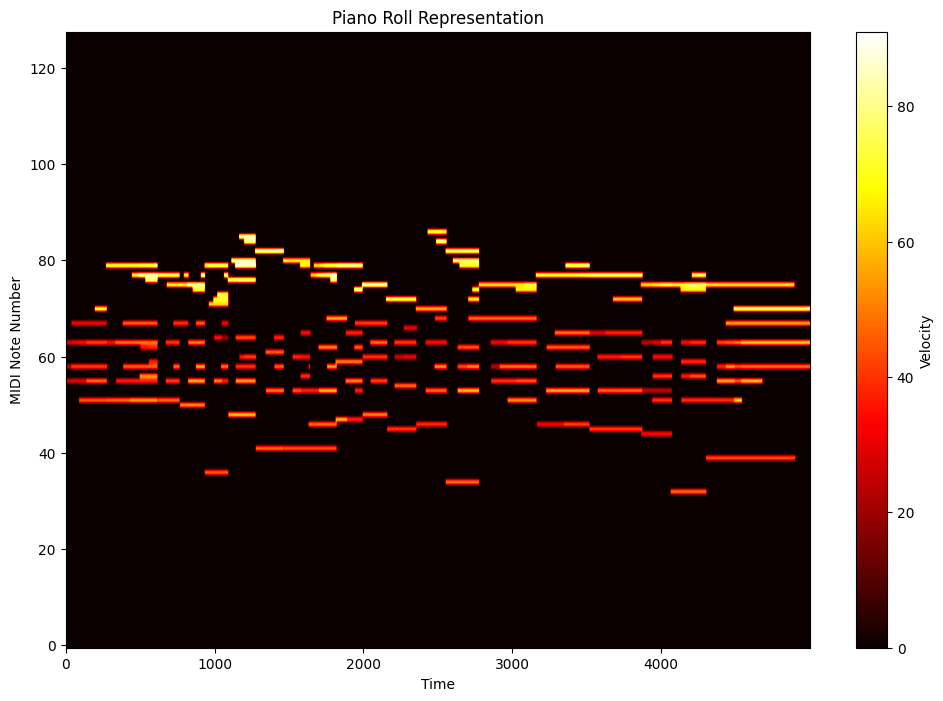

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='hot')
plt.title('Piano Roll Representation')
plt.xlabel('Time')
plt.ylabel('MIDI Note Number')
plt.colorbar(label='Velocity')
plt.show()